<a href="https://colab.research.google.com/github/iamritikiit/Punjab-Govt-Data/blob/main/Copy_of_Final_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: how to remove latitude_x	longitude_x	latitude_y	longitude_y these columns

import pandas as pd

# Google Sheet URL
sheet_url = "https://docs.google.com/spreadsheets/d/1DmfHAnhvuolTycM-dL5QL4AcW3-BOSEeItCrJgyQxZU/edit?usp=sharing"

# Convert to CSV export URL
csv_url = sheet_url.replace('/edit?usp=sharing', '/gviz/tq?tqx=out:csv')

# Read the data into a DataFrame
df = pd.read_csv(csv_url)

# Google Sheet URL
sheet_url = "https://docs.google.com/spreadsheets/d/1V4f3xRsmZpycC3zraoG1hTyztL9I9ej1P8p40ogBXc0/edit?usp=sharing"

# Convert to CSV export URL
csv_url = sheet_url.replace('/edit?usp=sharing', '/gviz/tq?tqx=out:csv')

# Read the data into a DataFrame
location_df = pd.read_csv(csv_url)

merged_df = pd.merge(df, location_df, on='village', how='left')

# Remove specified columns
columns_to_remove = ['latitude_x', 'longitude_x', 'latitude_y', 'longitude_y']
merged_df = merged_df.drop(columns=columns_to_remove, errors='ignore')

merged_df.to_csv('merged_data.csv', index=False)

merged_df.head()


,village,location1,proptype2,String1,RV_sqft,landtype,gender_desc_en,category_name_en,article_desc_en,area1,...,RV_GV,RV_GV_Bin,total_revenue,sd_percent,regfee_percent,reg_date,financial_year,Tag,latitude,longitude
0,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.190507,Rural,Male,Individual,Transfer of Property,17.98,...,19.677717,100-200%,0,NaN,0.0,2020-12-17,2020-21,Within 2 Acre from Road,30.719061,74.6952
1,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.067319,Rural,Female,Individual,Sale Deed,11.00,...,19.554529,100-200%,46800,1.500000,0.5,2020-10-26,2020-21,Within 2 Acre from Road,30.719061,74.6952
2,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.025580,Rural,Female,Individual,Sale Deed,3.00,...,18.364979,75-100%,38275,5.003922,1.0,2022-06-17,2022-23,Within 2 Acre from Road,30.719061,74.6952
3,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,38.700833,Rural,Male,Individual,Sale Deed,0.50,...,18.040232,75-100%,12960,5.000000,1.0,2022-06-17,2022-23,Within 2 Acre from Road,30.719061,74.6952
4,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,38.700833,Rural,Male,Individual,Sale Deed,0.50,...,18.040232,75-100%,12960,5.000000,1.0,2022-06-17,2022-23,Within 2 Acre from Road,30.719061,74.6952


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
df["financial_year"] = df["financial_year"].apply(lambda x: int(x[:4]))
df.head()  # Check the modified column


,village,location1,proptype2,String1,RV_sqft,landtype,gender_desc_en,category_name_en,article_desc_en,area1,...,RV_GV,RV_GV_Bin,total_revenue,sd_percent,regfee_percent,reg_date,financial_year,Tag,binary_target,financial_year_encoded
0,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.190507,Rural,Male,Individual,Transfer of Property,17.98,...,19.677717,100-200%,0,NaN,0.0,2020-12-17,2020,Within 2 Acre from Road,0,2020
1,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.067319,Rural,Female,Individual,Sale Deed,11.00,...,19.554529,100-200%,46800,1.500000,0.5,2020-10-26,2020,Within 2 Acre from Road,0,2020
2,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,39.025580,Rural,Female,Individual,Sale Deed,3.00,...,18.364979,75-100%,38275,5.003922,1.0,2022-06-17,2022,Within 2 Acre from Road,0,2022
3,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,38.700833,Rural,Male,Individual,Sale Deed,0.50,...,18.040232,75-100%,12960,5.000000,1.0,2022-06-17,2022,Within 2 Acre from Road,0,2022
4,Arriyanwala Kalan,2 Acre Behind The Road From The Road Of Arriya...,Agriculture,Faridkot - SRO - Faridkot - Arriyanwala Kalan ...,38.700833,Rural,Male,Individual,Sale Deed,0.50,...,18.040232,75-100%,12960,5.000000,1.0,2022-06-17,2022,Within 2 Acre from Road,0,2022


In [ ]:
# Compute mean and standard deviation
mean_value = df["circle_rate_sqft"].mean()
sde_value = df["circle_rate_sqft"].std()

# Assign binary labels
df["circle_rate_sqft_bin"] = df["circle_rate_sqft"].apply(
    lambda x: 1 if (mean_value - sde_value) <= x <= (mean_value + sde_value) else 0
)

df["circle_rate_sqft_bin"].value_counts()  # Check distribution of classes


,count
circle_rate_sqft_bin,
1,8301
0,450


In [ ]:
train_data = df[df["financial_year"] != 2023]
test_data = df[df["financial_year"] == 2023]

# Define features and target variable
features = ["village", "location1", "proptype2", "RV_sqft", "landtype",
            "gender_desc_en", "article_desc_en", "area1", "transaction_amount",
            "RV_GV", "sdfee", "reg_amount","financial_year"]
target = "circle_rate_sqft_bin"

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Apply encoding
for col in features:
    if df[col].dtype == "object":
        le = LabelEncoder()
        le.fit(X_train[col])  # Fit only on training data

        # Encode training data
        X_train.loc[:, col] = le.transform(X_train[col])

        # Safely encode test data, handle unseen labels
        X_test.loc[:, col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

        # Store encoder for future use
        label_encoders[col] = le

X_train.head()  # Check encoded data


,village,location1,proptype2,RV_sqft,landtype,gender_desc_en,article_desc_en,area1,transaction_amount,RV_GV,sdfee,reg_amount,financial_year
0,3,5,0,39.190507,0,1,3,17.98,NaN,19.677717,0,0,2020
1,3,5,0,39.067319,0,0,2,11.00,1170000.0,19.554529,35100,11700,2020
2,3,5,0,39.025580,0,0,2,3.00,637500.0,18.364979,31900,6375,2022
3,3,5,0,38.700833,0,1,2,0.50,216000.0,18.040232,10800,2160,2022
4,3,5,0,38.700833,0,1,2,0.50,216000.0,18.040232,10800,2160,2022


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [ ]:
y_pred = rf_model.predict(X_test)
print("Predictions:", y_pred[:10])  # Sample predictions


Predictions: [1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9942
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.94       138
           1       0.99      1.00      1.00      2795

    accuracy                           0.99      2933
   macro avg       0.99      0.95      0.97      2933
weighted avg       0.99      0.99      0.99      2933

Confusion Matrix:
 [[ 123   15]
 [   2 2793]]


In [ ]:
# Step 1: Define the input data
# Replace these values as needed, taking a sample from your dataset
input_data = {
    "village": "Arriyanwala Kalan",
    "location1": "2 Acre Behind The Road From The Road Of Arriyanwala Kalan (agriculture)",
    "proptype2": "Agriculture",
    "RV_sqft": 39.19,
    "landtype": "Rural",
    "gender_desc_en": "Male",
    "article_desc_en": "Transfer of Property",
    "area1": 17.98,
    "transaction_amount": 5100000,
    "RV_GV": 19.68,
    "sdfee": 0,
    "reg_amount": 0,
    "financial_year": 2025,  # Financial year 2025
}

# Step 2: Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Step 3: Encode the input data
for col in input_df.columns:
    if col in label_encoders:  # Use the existing label encoders
        le = label_encoders[col]
        input_df[col] = input_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Step 4: Predict using the trained model
predicted_class = rf_model.predict(input_df)

# Step 5: Output the prediction
print(f"Predicted class (Circle Rate Bin) for Financial Year 2025: {predicted_class[0]}")


Predicted class (Circle Rate Bin) for Financial Year 2025: 1


In [ ]:
import pandas as pd

# Google Sheets CSV link
csv_url = "https://docs.google.com/spreadsheets/d/1sM6LwKCMyhZ6BrfA0U6Tk4fiyCBwaXtMZLByAdZsnjY/export?format=csv"

# Load the dataset
df = pd.read_csv(csv_url)

# Display first 5 rows
print(df.head())


     village                       location1    proptype2    RV_sqft landtype  \
0       Ahel              Ahel (agriculture)  Agriculture  19.571314    Rural   
1       Ahel              Ahel (agriculture)  Agriculture  19.521973    Rural   
2       Ahel              Ahel (agriculture)  Agriculture  20.152150    Rural   
3       Ahel              Ahel (agriculture)  Agriculture  19.926002    Rural   
4  Ajit Gill  Behind Two Acre From Main Road  Agriculture  22.382318    Rural   

  gender_desc_en       article_desc_en  area1  transaction_amount     RV_GV  \
0           Male             Sale Deed   1.77            116000.0  1.206335   
1         Female             Sale Deed   5.00            531500.0  1.156994   
2           Male  Transfer of Property  14.00                 NaN  0.868922   
3           Male             Sale Deed   9.00            976500.0  0.642774   
4         Female             Sale Deed  40.00           4875000.0  6.886867   

    sdfee  reg_amount financial_year  

In [ ]:
print("Before cleaning:")
print(df['status'].isna().sum())  # Count NaN values in status
print(df['status'].unique())  # Show unique values


Before cleaning:
0
['same' 'gradual change' 'sudden change' 'unknown']


new code

In [29]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/1sM6LwKCMyhZ6BrfA0U6Tk4fiyCBwaXtMZLByAdZsnjY/export?format=csv"
df = pd.read_csv(csv_url)

# Print the first few rows to see the data
print(df.head())


     village                       location1    proptype2    RV_sqft landtype  \
0       Ahel              Ahel (agriculture)  Agriculture  19.571314    Rural   
1       Ahel              Ahel (agriculture)  Agriculture  19.521973    Rural   
2       Ahel              Ahel (agriculture)  Agriculture  20.152150    Rural   
3       Ahel              Ahel (agriculture)  Agriculture  19.926002    Rural   
4  Ajit Gill  Behind Two Acre From Main Road  Agriculture  22.382318    Rural   

  gender_desc_en       article_desc_en  area1  transaction_amount     RV_GV  \
0           Male             Sale Deed   1.77            116000.0  1.206335   
1         Female             Sale Deed   5.00            531500.0  1.156994   
2           Male  Transfer of Property  14.00                 NaN  0.868922   
3           Male             Sale Deed   9.00            976500.0  0.642774   
4         Female             Sale Deed  40.00           4875000.0  6.886867   

    sdfee  reg_amount financial_year  

In [30]:
df.head()

,village,location1,proptype2,RV_sqft,landtype,gender_desc_en,article_desc_en,area1,transaction_amount,RV_GV,sdfee,reg_amount,financial_year,status
0,Ahel,Ahel (agriculture),Agriculture,19.571314,Rural,Male,Sale Deed,1.77,116000.0,1.206335,3400,1160,2020-21,same
1,Ahel,Ahel (agriculture),Agriculture,19.521973,Rural,Female,Sale Deed,5.00,531500.0,1.156994,15900,5315,2021-22,same
2,Ahel,Ahel (agriculture),Agriculture,20.152150,Rural,Male,Transfer of Property,14.00,NaN,0.868922,0,0,2022-23,gradual change
3,Ahel,Ahel (agriculture),Agriculture,19.926002,Rural,Male,Sale Deed,9.00,976500.0,0.642774,48935,9765,2023-24,same
4,Ajit Gill,Behind Two Acre From Main Road,Agriculture,22.382318,Rural,Female,Sale Deed,40.00,4875000.0,6.886867,243800,48750,2019-20,same


In [31]:
df['status'] = df['status'].map({'same': 0, 'gradual change': 0}).fillna(1)

# Verify the unique values
print("Unique values in status after mapping:", df['status'].unique())  # Should print only [0, 1]


Unique values in status after mapping: [0. 1.]


Fill Missing Numerical Values


In [32]:
df['transaction_amount'].fillna(df['transaction_amount'].median(), inplace=True)


<ipython-input-32-ab3160d20451>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_amount'].fillna(df['transaction_amount'].median(), inplace=True)


One hot encoding

In [35]:
len(df)

2098

In [33]:
df = pd.get_dummies(df, columns=['village', 'location1', 'proptype2', 'landtype', 'gender_desc_en', 'article_desc_en'], drop_first=True)


In [36]:
X = df.drop(columns=['status', 'financial_year'])
y = df['status']


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1678, 621)
Testing data shape: (420, 621)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['RV_sqft', 'area1', 'transaction_amount', 'RV_GV', 'sdfee', 'reg_amount']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only on numerical columns
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [39]:
import numpy as np
from sklearn.utils import class_weight

# Convert to NumPy array
class_weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)

# Convert result to dictionary format required by RandomForestClassifier
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train the model with balanced class weights
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight={0: np.float64(0.5224159402241594),
                                     1: np.float64(11.652777777777779)},
                       random_state=42)

In [42]:
# Get probability predictions
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Set a lower threshold (e.g., 0.3 instead of 0.5)
threshold = 0.2
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Find indices where predicted status = 1
predicted_1_indices = X_test.index[y_pred_adjusted == 1]

# Count the number of 1s predicted
print("Number of 1s predicted:", sum(y_pred_adjusted))


Number of 1s predicted: 6


In [43]:
# Get the status values for the rows in X_test
status_values = df.loc[X_test.index, 'status']

# Print all status values in test data
print(status_values.value_counts())  # Count occurrences of each status value


status
0.0    395
1.0     25
Name: count, dtype: int64


In [44]:
import numpy as np
print("Predicted 1s:", np.sum(y_pred_adjusted == 1))
print("Predicted 0s:", np.sum(y_pred_adjusted == 0))


Predicted 1s: 6
Predicted 0s: 414


In [27]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

# Print Accuracy & Report
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9404761904761905


Feature Importance

In [16]:
import pandas as pd

# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print top 20 important features
print(feature_importances.head(20))


RV_sqft                                                                        0.106454
RV_GV                                                                          0.096520
area1                                                                          0.089778
transaction_amount                                                             0.078061
reg_amount                                                                     0.049567
sdfee                                                                          0.045210
village_Jaitu                                                                  0.034380
proptype2_Residential                                                          0.033051
landtype_Urban                                                                 0.021328
gender_desc_en_Male                                                            0.018560
village_Faridkot- Urban                                                        0.016607
village_Kotkapura               

code for checking threshold of 1 (in casae of weak 1 data)

In [19]:
# Convert y_probs into a DataFrame with correct indexing
y_probs_df = pd.DataFrame(y_probs, index=X_test.index, columns=['prob_1'])

# Get probabilities only for the rows where actual status = 1
actual_1_probs = y_probs_df.loc[y_test[y_test == 1].index]

print(actual_1_probs)


      prob_1
1446    0.11
973     0.04
1581    0.19
1378    0.11
2085    0.02
916     0.02
259     0.00
765     0.00
275     0.04
999     0.07
1995    0.08
1964    0.05
438     0.02
923     0.02
519     0.02
1128    0.02
674     0.02
944     0.07
1617    0.09
544     0.05
427     0.04
1493    0.09
514     0.06
2089    0.04
1132    0.03


In [45]:
# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    "Actual Status": y_test.loc[predicted_1_indices],
    "Predicted Probability": y_probs_df.loc[predicted_1_indices, "prob_1"]
})

print(comparison_df)


      Actual Status  Predicted Probability
985             0.0                   0.22
1033            0.0                   0.20
538             0.0                   0.20
1337            0.0                   0.25
1338            0.0                   0.25
1037            0.0                   0.24


In [23]:
print(y_train.value_counts())


status
0.0    1606
1.0      72
Name: count, dtype: int64


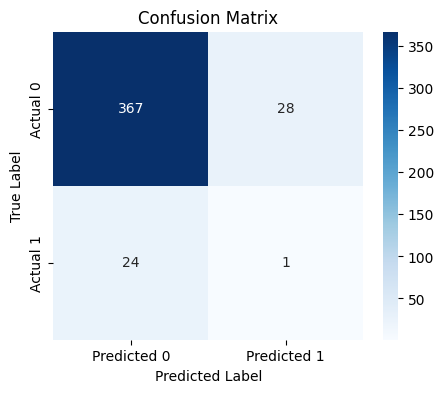

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       395
         1.0       0.03      0.04      0.04        25

    accuracy                           0.88       420
   macro avg       0.49      0.48      0.49       420
weighted avg       0.88      0.88      0.88       420



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the chosen threshold (e.g., 0.15)
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
y_pred = (y_pred_probs >= 0.15).astype(int)  # Convert to binary using threshold

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
